Numpy is a Python library for efficient numerical computing that is widely used in data science and engineering. Numpy provides support for large, multi-dimensional arrays and matrices, along with a collection of high-level functions to operate on these arrays. The true power of Numpy lies in the ability to vectorize computations, which allow for element-wise operations on arrays without the need for explicit loops. This feature enhances performance and efficiency, particularly in data-intensive tasks. [Numpy Documentation](https://docs.scipy.org/doc/numpy/reference/index.html)


## Element-wise computations using Numpy arrays

We will start this tutorial by learning about some of the limitations of traditional Python lists. Then, the power of Numpy element-wise (or vectorized) computations will become evident. As much as I like agronomic examples, for the first few exercises I will use some trivial arrays of numbers to keep it simple.

Vectorized or element-wise computations refer to operations that are performed on arrays (vectors, matrices) directly and simultaneously. Instead of processing elements one by one using loops, vectorized operations apply a single action to each element in the array without explicit iteration. This leads to more concise code and often improved performance. Both `vectorized` and `element-wise` temrs are correct and often are used interchangeably.

Let's begin by importing the Numpy module, so that we already have it for the entire tutorial.

In [3]:
# Import numpy module
import numpy as np
import matplotlib.pyplot as plt # We will need this for some figures

### Product of a regular list by a scalar

In [63]:
# Create a list of elements
A = [1,2,3,4]

# Multiple the list by a scalar
print(A * 3)


[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]


### Product of two regular lists with the same shape

In [64]:
# Create list B, with the same size as A
B = [5,6,7,8]

# Multiple the two lists together. Heads up! This will not work!
print(A*B)


TypeError: can't multiply sequence by non-int of type 'list'

The first operation repeats the list three times, which is probably not exactly what you were expecting. The second example results in an error. Now let's import the Numpy module and try these operations again to see what happens.


### Product of a Numpy array by a scalar

In [65]:
# Create a list of elements
A = np.array([1,2,3,4])

# Check type of newly created Numpy array
print(type(A))

print(A * 3)

<class 'numpy.ndarray'>
[ 3  6  9 12]


### Product of two Numpy arrays with the same shape

In [66]:
# Re-define the previous arrays as numpy arrays
A = np.array([1,2,3,4])
B = np.array([5,6,7,8])

print(A * B)


[ 5 12 21 32]


### Other operations with Numpy arrays

In [67]:
print(A * 3)   # Vector times a scalar
print(A + B)
print(A - B)
print(A * B)
print(A / B)
print(np.sqrt(A**2 + B**2)) # Exponentiation Calculate hypotenuse of multiple rectangle triangle
print(A.sum())
print(B.sum())


[ 3  6  9 12]
[ 6  8 10 12]
[-4 -4 -4 -4]
[ 5 12 21 32]
[0.2        0.33333333 0.42857143 0.5       ]
[5.09901951 6.32455532 7.61577311 8.94427191]
10
26


## Example 1: Compute soil water storage for a single field

Soil water storage directly influences plant growth and crop yield since it is an essential processes for transpiration and nutrient uptake. In irrigated cropping systems, monitoring of soil water storage is important for irrigation scheduling and effective water management and conservation. 

Assume a field that has a soil profile with five horizons, each measuring: `10, 20, 30, 30, and 30` cm in thickness (so about 1.2 m depth). The volumetric water content for each horizon was determined by soil moisture sensors located at the center of each horizon, hence providing an average moisture value of: `0.350, 0.280, 0.255, 0.210, 0.137` $cm^3/cm^3$. Based on this information, compute the soil water storage for each soil horizon and the total for the entire soil profile. Recall that the volumetric water content represents the volume of water per unit volume of soil, so 0.350 $cm^3/cm^3$ is the same as 35% moisture by volume or by thickness of the soil horizon. How much irrigation water does a farmer need to add to reach a field capacity of 420 mm?

In [62]:
# Define variables
theta_v = np.array([0.350, 0.280, 0.255, 0.210, 0.137]) # cm^3/cm^3
depths = np.array([10, 20, 30, 30, 30]) * 10 # horizons in mm

# Compute water storage for each layer
storage_per_layer = theta_v * depths # mm of water per layer
print('Storage for each layer:', np.round(storage_per_layer,1))

# Compute soil water storage for the entire profile
profile_storage = np.sum(storage_per_layer)
print(f'Total water storage in profile is: {profile_storage:.1f} mm')

field_capacity = 420 # mm
irrigation_req = field_capacity - profile_storage
print(f'Required irrigation: {irrigation_req:.1f} mm')


Storage for each layer: [35.  56.  76.5 63.  41.1]
Total water storage in profile is: 271.6 mm
Required irrigation: 148.4 mm


## Example 2: Compute soil water storage for multiple fields

Now imagine that we are managing three irrigated fields in the region? Assume that all the fields are nearby and have the same soil horizons, but farmers have different crops and irrigation strategies so they also have different soil moisture contents across the profile. What is the soil water storage of each field? How much water do we need to apply in each field to bring them back to field capacity?

In [63]:
# Example soil moisture for the 5 horizons and three fields
# The first field is the same as in the previous exercise
theta_v = np.array([[0.350, 0.280, 0.255, 0.210, 0.137],
                    [0.250, 0.380, 0.355, 0.110, 0.250],
                    [0.150, 0.180, 0.155, 0.110, 0.320]]) # cm^3/cm^3

# Compute storage for all horizons
storage_per_layer = theta_v * depths
print(storage_per_layer)

# Compute
storage_profiles = np.sum(storage, axis=1) # axis=1 means add along columns
print(storage_profiles)

# Irrigation requirements
irrigation_req = field_capacity - storage_profiles
print('Irrigation for each field:', irrigation_req, 'mm')

[[ 35.   56.   76.5  63.   41.1]
 [ 25.   76.  106.5  33.   75. ]
 [ 15.   36.   46.5  33.   96. ]]
[271.6 315.5 226.5]
Irrigation for each field: [148.4 104.5 193.5] mm


### Example 3: Determine the CEC of a soil

The cation exchange capacity (CEC, meq/100 g of soil) of a soil is determined by the nature and amount of clay minerals and organic matter. Compute the CEC of a soil that has 32% clay and 3% organic matter. The clay fraction is represented by 30% kaolinite, 50% montmorillonite, and 20% vermiculite. The CEC for clay minerals and organic matter can be found in most soil fertility textbooks.


In [54]:
# Determine percentage of each clay mineral

om = np.array([4]) # percent
om_cec = np.array([200]) # meq/100 g

clay = 32 * np.array([30, 50, 20])/100 # This is the % of each clay type
clay_cec = np.array([10, 100, 140]) # meq/100 g

# Merge the fractions and CEC together into a single aray
all_fractions = np.concatenate((om, clay))/100 # percent to fraction
all_cec = np.concatenate((om_cec, clay_cec))

print(all_fractions)
print(all_cec)


[0.04  0.096 0.16  0.064]
[200  10 100 140]


In [34]:
# Compute soil CEC as the weighed-sum of its components
soil_cec = np.sum(all_cec * all_fractions)
print(f'The soil CEC is: {soil_cec:.1f} meq/100 g of soil')


The soil CEC is: 33.9 meq/100 g of soil


### Create arrays with specific data types

In [68]:
# An alternative by specifying the data type
print(np.array([1,2,3,4], dtype="int64"))
print(np.array([1,2,3,4], dtype="float64"))


[1 2 3 4]
[1. 2. 3. 4.]


### Operations with two-dimensional arrays

In [69]:
# Define arrays
# The values in M and v were arbitrarily selected
# so that the operations result in round numbers for clarity. You can change them.

M = np.array([ [10,2,1], [25,6,55] ]) # 2D matrix
v = np.array([0.2, 0.5, 1]) # 1D vector


In [70]:
# Access Numpy array shape and size properties
print(M.shape) # rows and columns
print(M.size) # Total number of elements


(2, 3)
6


In [71]:
# Element-wise multiplication
print('Matrix by a scalar')
print(M*2)

print('Matrix by a vector with same number of columns')
print(M * v)

print('Matrix by matrix of the same size')
print(M*M)


Matrix by a scalar
[[ 20   4   2]
 [ 50  12 110]]
Matrix by a vector with same number of columns
[[ 2.  1.  1.]
 [ 5.  3. 55.]]
Matrix by matrix of the same size
[[ 100    4    1]
 [ 625   36 3025]]


In [72]:
# Dot product (useful for linear algebra operations)
print('Dot product operation')
np.dot(M,v)


Dot product operation


array([ 4., 63.])

### Reshape arrays


In [73]:
# Reshape M array (original 2 rows 3 columns)
print(M)

# Reshape to 3 rows and 2 columns
print(M.reshape(3,2))

# Reshape to 1 row and 0 columns (1D array)
print(M.reshape(6,1))
print(M.reshape(6,1).shape) # Check the shape

# Similar

[[10  2  1]
 [25  6 55]]
[[10  2]
 [ 1 25]
 [ 6 55]]
[[10]
 [ 2]
 [ 1]
 [25]
 [ 6]
 [55]]
(6, 1)


## Numpy boolean operations


In [74]:
expr1 = np.array([1,2,3,4]) == 3
print(expr1)

expr2 = np.array([1,2,3,4]) == 2
print(expr2)


[False False  True False]
[False  True False False]


In [75]:
# Elements in both vectors need to match to be considered True
print(expr1 & expr2) # print(expr1 and expr2)

# It is sufficient with a single match in one of the vectors
print(expr1 | expr2) # print(expr1 or expr2)


[False False False False]
[False  True  True False]


## Flattening

Sometimes we want to serialize our 2D or 3D matrix into a long one-dimensional vector. This operation is called "flattening" and Numpy has a specific method to carry this operation that is called *flattening* and array.


In [76]:
# Flatten two-dimensional array M
M.flatten()

array([10,  2,  1, 25,  6, 55])

## Use the Numpy random module to create a random image

To show some of the power of working with Numpy arrays we will create a random image. Images in the RGB (red-green-blue) color space are represented by three matrices that encode the color of each pixel. Colors are represented with an integer between 0 and 255. This is called an 8-bit integer, and there are only 2^8 = 256 possible integers. Because each image has three bands (one for red, one for green, and one for blue) there is a total of 17 million (256x256x256 or 256^3) possible colors for each pixel.

Image size: (20, 30, 3)


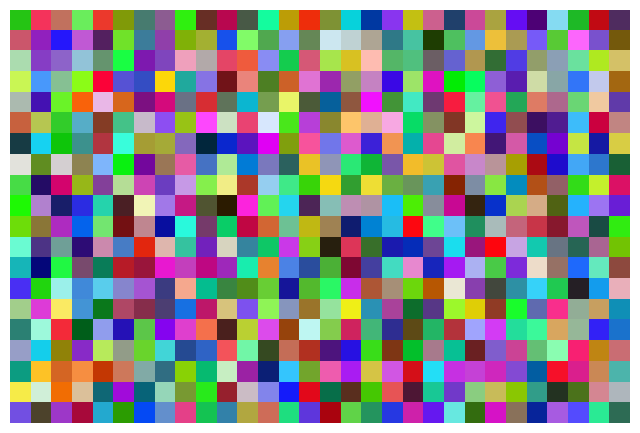

In [77]:
# Define image size (keep it small so that you can see each pixel)
rows = 20
cols = 30

# Set seed for reproducibility.
# Everyone will obtain the same random numbers
np.random.seed(1) 

# Create image bands
# uint8 means unsigned interger of 8-bits
R = np.random.randint(0, 255, [rows,cols], dtype='uint8') 
G = np.random.randint(0, 255, [rows,cols], dtype='uint8')
B = np.random.randint(0, 255, [rows,cols], dtype='uint8')

# Stack image bands (axis=2 means along the third dimension, or on top of each other)
RGB = np.stack( (R,G,B), axis=2)
print('Image size:', RGB.shape) # Shape of the RGB variable

# Display image using the matplotlib library (we imported this at the top)
plt.figure(figsize=(8,8))
plt.imshow(RGB)
plt.axis('off') # Mute this line to see what the image looks like without it.
plt.show()


## Numpy handy functions

In [82]:
# Generate a range of integers
# np.arange(start,stop,step)
print('range()')
print(np.arange(0,100,10))

# Generate linear range
# numpy.linspace(start, stop, num=50, endpoint=True)
print('')
print('linspace()')
print(np.linspace(0, 10, 5))

# Array of zeros
print('')
print('zeros()')
print(np.zeros([5,3]))

# Array of ones
print('')
print('ones()')
print(np.ones([4,3]))

# Array of NaN values
print('')
print('full()')
print(np.full([4,3], np.nan)) # This also worksprint(np.ones([4,3])*np.nan)

# Meshgrid (first create 1D vectors, then create a 2D mesh)
N = 5
lat = np.linspace(36, 40, N)
lon = np.linspace(-102, -98, N)
LAT,LON = np.meshgrid(lat,lon)
print('')
print('Grid of latitudes')
print(LAT)
print('')
print('Grid of longitudes')
print(LON)


range()
[ 0 10 20 30 40 50 60 70 80 90]

linspace()
[ 0.   2.5  5.   7.5 10. ]

zeros()
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

ones()
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

full()
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]

Grid of latitudes
[[36. 37. 38. 39. 40.]
 [36. 37. 38. 39. 40.]
 [36. 37. 38. 39. 40.]
 [36. 37. 38. 39. 40.]
 [36. 37. 38. 39. 40.]]

Grid of longitudes
[[-102. -102. -102. -102. -102.]
 [-101. -101. -101. -101. -101.]
 [-100. -100. -100. -100. -100.]
 [ -99.  -99.  -99.  -99.  -99.]
 [ -98.  -98.  -98.  -98.  -98.]]


## Create a noisy wave

With Numpy we can easily implement models, create timeseries, add noise, and perform trigonometric operations. In this example we will create a synthetic timeseries of air temperature using a cosine wave. To make this more realistic we will also add some noise.


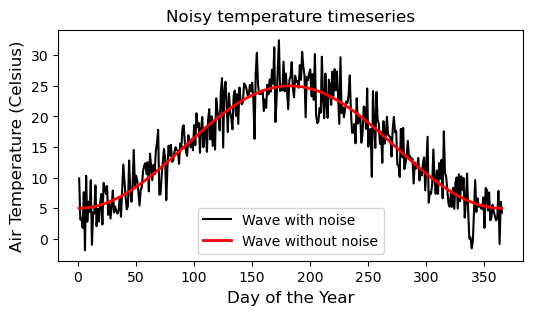

In [90]:
# Set random seed for reproducibility
np.random.seed(1) 

# Define wave inputs
T_avg = 15 # Annual average in Celsius
A = 10 # Annual amplitude [Celsius]
doy = np.arange(1,366) # Vector of days of the year

# Generate x and y axis
x = 2 * np.pi * doy/365 # Convert doy into pi-radians 
y = T_avg - A*np.cos(x) # Sine wave

# Add random noise
noise = np.random.normal(0, 3, x.size)  # White noise having zero mean
y_noisy = y + noise

# Visualize wave using Matplotlib
plt.figure(figsize=(6,3))
plt.title('Noisy temperature timeseries')
plt.plot(doy, y_noisy, '-k', label="Wave with noise")
plt.plot(doy, y, '-r', linewidth=2, label="Wave without noise")
plt.xlabel('Day of the Year', size=12)
plt.ylabel('Air Temperature (Celsius)', size=12)
plt.legend()
plt.show()


### Descriptive stats

To finish our tutorial, let's inpsect Numpy methods to obtain some descriptive statistics for the wave we created earlier.

In [86]:
# Descriptive stats
print('Mean:', y.mean()) # Arithmetic average
print('Standard deviation:', y.std()) # Standard deviation
print('Variance:', y.var()) # Variance
print('Median:', np.median(y)) # Median
print('Minimum:', y.min()) # Minimum
print('Maximum:', y.max()) # Maximum
print('Index of minimum:', y.argmin()) # Position of minimum value
print('Index of maximum:', y.argmax()) # Position of maximum value
print('50th percentile:', np.percentile(y, 50)) # 50th percentile (should equal to the median)
print('5th and 95th percentiles:', np.percentile(y, [5,95])) # 5th and 95th percentile


Mean: 15.0
Standard deviation: 7.0710678118654755
Variance: 50.0
Median: 15.000000000000007
Minimum: 5.000092602638098
Maximum: 24.999907397361902
Index of minimum: 273
Index of maximum: 90
50th percentile: 15.000000000000007
5th and 95th percentiles: [ 5.12930816 24.87069184]


## Reference

Walt, S.V.D., Colbert, S.C. and Varoquaux, G., 2011. The NumPy array: a structure for efficient numerical computation. Computing in science & engineering, 13(2), pp.22-30.